Firstly, we import the library needed.


In [0]:
from keras.layers import Dense, LSTM, Dropout, BatchNormalization, Embedding, Conv1D, MaxPooling1D, Bidirectional
from keras.models import Sequential
from keras.datasets import imdb
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using TensorFlow backend.


The imdb dataset is then loaded

In [0]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 2s 0us/step


In [0]:
X_train[:5]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [0]:
y_train[:5]

array([1, 0, 0, 1, 0])

We can have a look on the length distribution.

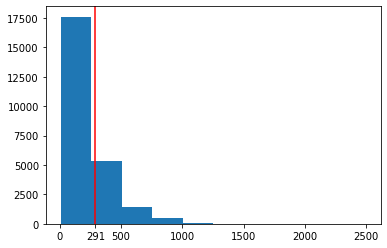

In [0]:
lengths=list(map(len,X_train))
plt.hist(lengths,)
p75=np.quantile(lengths, .75)
plt.axvline(p75,color='r')
plt.xticks([p75,0,500,1000,1500,2000,2500])
plt.show()


The following is the parameters to be used.

In [0]:
num_vocab=3000#max(map(max,X_train))
maxlen=200
padding='post'
truncating='post'
embed_dim=4

The sequences are padded so that they can be fitted to a neural network.

In [0]:
X_train_pad=pad_sequences(X_train, maxlen=maxlen, padding=padding, truncating=truncating)
X_test_pad=pad_sequences(X_test, maxlen=maxlen, padding=padding, truncating=truncating)

X_train_pad[:5]

array([[    1,    14,    22,    16,    43,   530,   973,  1622,  1385,
           65,   458,  4468,    66,  3941,     4,   173,    36,   256,
            5,    25,   100,    43,   838,   112,    50,   670, 22665,
            9,    35,   480,   284,     5,   150,     4,   172,   112,
          167, 21631,   336,   385,    39,     4,   172,  4536,  1111,
           17,   546,    38,    13,   447,     4,   192,    50,    16,
            6,   147,  2025,    19,    14,    22,     4,  1920,  4613,
          469,     4,    22,    71,    87,    12,    16,    43,   530,
           38,    76,    15,    13,  1247,     4,    22,    17,   515,
           17,    12,    16,   626,    18, 19193,     5,    62,   386,
           12,     8,   316,     8,   106,     5,     4,  2223,  5244,
           16,   480,    66,  3785,    33,     4,   130,    12,    16,
           38,   619,     5,    25,   124,    51,    36,   135,    48,
           25,  1415,    33,     6,    22,    12,   215,    28,    77,
      

In [0]:
model=Sequential()
model.add(Embedding(input_dim=num_vocab, output_dim=embed_dim,input_length=maxlen))

model.add(Conv1D(64, 5))
model.add(MaxPooling1D(10,2))
model.add(Dropout(0.9))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Dropout(0.9))
model.add(Bidirectional(LSTM(16, return_sequences=False)))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(20))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=Adam(lr=0.01, epsilon=1e-10))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 4)            12000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 196, 64)           1344      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 94, 64)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 94, 64)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 94, 64)            256       
____________________________________

In [0]:
model.fit(X_train_pad, 
          y_train, 
          validation_data=(X_test_pad, y_test), 
          callbacks=[ReduceLROnPlateau(monitor='val_acc', 
                                       patience=3, 
                                       verbose=1),
                     EarlyStopping(monitor='val_acc',
                                   patience=10,
                                   verbose=1)],
          epochs=100,
          batch_size=1024,
          workers=4)




Train on 25000 samples, validate on 25000 samples
Epoch 1/100





25000/25000 [==============================] - 40s 2ms/step - loss: 0.7253 - acc: 0.5035 - val_loss: 0.6963 - val_acc: 0.4995
Epoch 2/100
25000/25000 [==============================] - 29s 1ms/step - loss: 0.6965 - acc: 0.5022 - val_loss: 0.6968 - val_acc: 0.4999
Epoch 3/100
25000/25000 [==============================] - 29s 1ms/step - loss: 0.6950 - acc: 0.5034 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 4/100
25000/25000 [==============================] - 29s 1ms/step - loss: 0.6938 - acc: 0.5088 - val_loss: 0.7026 - val_acc: 0.5004
Epoch 5/100
25000/25000 [==============================] - 29s 1ms/step - loss: 0.6416 - acc: 0.6340 - val_loss: 1.6854 - val_acc: 0.5586
Epoch 6/100
25000/25000 [==============================] - 29s 1ms/step - loss: 0.5179 - acc: 0.7609 - val_loss: 0.9511 - val_acc: 0.6989
Epoch 7/100
25000/25000 [==============================] - 29s 1ms/step - loss: 0.4727 - acc: 0.7908 - val_loss: 0

The performance of the neural network is shown below.

In [0]:
print("Accuracy for train set is ", model.evaluate(X_train_pad, y_train, batch_size=1024, use_multiprocessing=True)[1])
print("Accuracy for test set is ", model.evaluate(X_test_pad, y_test, batch_size=1024, use_multiprocessing=True)[1])


25000/25000 [==============================] - 8s 310us/step
Accuracy for train set is  0.8922799998474121
25000/25000 [==============================] - 8s 310us/step
Accuracy for test set is  0.8377600003433228
